In [1]:
import pandas as pd
import numpy as np

data=pd.read_csv("C:\\Users\\User\\Downloads\\USA_cars_datasets.csv")

In [2]:
data

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,2494,7800,nissan,versa,2019,clean vehicle,23609.0,red,3n1cn7ap9kl880319,167722715,california,usa,1 days left
2495,2495,9200,nissan,versa,2018,clean vehicle,34553.0,silver,3n1cn7ap5jl884088,167762225,florida,usa,21 hours left
2496,2496,9200,nissan,versa,2018,clean vehicle,31594.0,silver,3n1cn7ap9jl884191,167762226,florida,usa,21 hours left
2497,2497,9200,nissan,versa,2018,clean vehicle,32557.0,black,3n1cn7ap3jl883263,167762227,florida,usa,2 days left


In [3]:
data = data.drop(columns=['Unnamed: 0','vin', 'lot'])
data

,price,brand,model,year,title_status,mileage,color,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,florida,usa,22 hours left
...,...,...,...,...,...,...,...,...,...,...
2494,7800,nissan,versa,2019,clean vehicle,23609.0,red,california,usa,1 days left
2495,9200,nissan,versa,2018,clean vehicle,34553.0,silver,florida,usa,21 hours left
2496,9200,nissan,versa,2018,clean vehicle,31594.0,silver,florida,usa,21 hours left
2497,9200,nissan,versa,2018,clean vehicle,32557.0,black,florida,usa,2 days left


In [4]:
print("Price ranges from ", min(data['price']), " to ", max(data['price']), "\n")
print("Unique values for 'brand': ", '\n', data['brand'].unique(), "\n")
print("Unique values for 'model': ", '\n', data['model'].unique(), "\n")
print("Unique values for 'year': ", '\n', data['year'].unique(), "\n")
print("Unique values for 'title status': ", '\n', data['title_status'].unique(), "\n")
print("Mileage ranges from ", min(data['mileage']), " to ", max(data['mileage']), "\n")
print("Unique values for 'color': ", '\n', data['color'].unique(), "\n")
print("Unique values for 'state': ", '\n', data['state'].unique(), "\n")
print("Unique values for 'country': ", '\n', data['country'].unique(), "\n")
print("Unique values for 'condition': ", '\n', data['condition'].unique())

Price ranges from  0  to  84900 

Unique values for 'brand':  
 ['toyota' 'ford' 'dodge' 'chevrolet' 'gmc' 'chrysler' 'kia' 'buick'
 'infiniti' 'mercedes-benz' 'jeep' 'bmw' 'cadillac' 'hyundai' 'mazda'
 'honda' 'heartland' 'jaguar' 'acura' 'harley-davidson' 'audi' 'lincoln'
 'lexus' 'nissan' 'land' 'maserati' 'peterbilt' 'ram'] 

Unique values for 'model':  
 ['cruiser' 'se' 'mpv' 'door' '1500' 'pk' 'malibu' 'coupe' 'wagon' 'forte'
 'encore' 'sorento' 'doors' 'chassis' 'q70' 'camaro' 'convertible' 'vans'
 'srw' 'compass' 'enclave' '300' 'cherokee' 'pacifica' 'x3' 'equinox'
 'challenger' 'm' 'colorado' 'focus' 'durango' 'escape' 'charger'
 'explorer' 'f-150' '3500' 'caravan' 'van' 'dart' '2500' 'esv' 'cutaway'
 'el' 'edge' 'series' 'flex' 'srx' 'cab' 'pickup' 'vehicl' 'trax' 'tahoe'
 'suburban' 'cargo' 'drw' 'fiesta' 'impala' 'soul' 'elantra' 'pioneer'
 'trail' 'traverse' 'country' 'sundance' 'road/street' 'nautilus' 'gx'
 'q5' 'gle' 'sportage' '5' 'sport' 'discovery' 'acadia' 'ghibli' 

In [5]:
# Handle 'condition'
# if name has "minutes" -> 0
# if name has "hours" -> 1
# if name has "days" -> 2
# else -> 3
from nltk.tokenize.casual import TweetTokenizer

con=data['condition']
tok=TweetTokenizer()
new=[]
for i in range(len(data)):
    a=tok.tokenize(con[i])
    if 'minutes' in a: 
        new.append(0)
    elif 'hours' in a:
        new.append(1)
    elif 'days' in a:
        new.append(2)
    else:
        new.append(3)

print(new)
data['condition']=new
print(data)

[2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 

In [6]:
# turn non-numeric data to numeric
from sklearn.preprocessing import OrdinalEncoder


numeric_data=data
ord_enc = OrdinalEncoder()
class_names=['brand', 'model', 'title_status', 'color', 'state', 'country']
for i in class_names: numeric_data[i]=ord_enc.fit_transform(numeric_data[[i]])
print(numeric_data)


      price  brand  model  year  title_status   mileage  color  state  \
0      6300   27.0   25.0  2008           0.0  274117.0    2.0   24.0   
1      2899    8.0   92.0  2011           0.0  190552.0   39.0   35.0   
2      5350    7.0   75.0  2018           0.0   39590.0   39.0    7.0   
3     25000    8.0   32.0  2014           0.0   64146.0    4.0   39.0   
4     27700    5.0    0.0  2018           0.0    6654.0   34.0    6.0   
...     ...    ...    ...   ...           ...       ...    ...    ...   
2494   7800   24.0  120.0  2019           0.0   23609.0   34.0    3.0   
2495   9200   24.0  120.0  2018           0.0   34553.0   39.0    6.0   
2496   9200   24.0  120.0  2018           0.0   31594.0   39.0    6.0   
2497   9200   24.0  120.0  2018           0.0   32557.0    2.0    6.0   
2498   9200   24.0  120.0  2018           0.0   31371.0   39.0    6.0   

      country  condition  
0         1.0          2  
1         1.0          2  
2         1.0          2  
3         1.0  

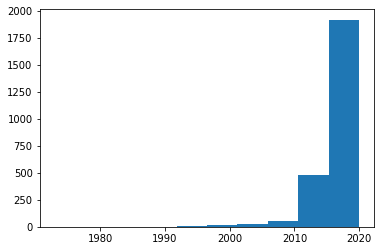

Counter({2019: 892, 2018: 395, 2017: 377, 2016: 203, 2015: 196, 2014: 104, 2013: 86, 2012: 72, 2020: 48, 2011: 23, 2008: 18, 2010: 13, 2009: 11, 2003: 9, 2006: 8, 2005: 6, 2007: 6, 2004: 6, 2001: 5, 2000: 4, 1998: 4, 2002: 2, 1994: 2, 1997: 2, 1996: 2, 1973: 1, 1999: 1, 1984: 1, 1995: 1, 1993: 1})


In [7]:
# 'year' and 'mileage' need to become categorical.
# handling year
from matplotlib import pyplot

year=data['year']
pyplot.hist(year)
pyplot.show()
#therefore, we discern three "obvious" groups. 1990-(around)2010, 2010-(around)2015, 2015-2020
#for more clarity we check the occurence of each item

from collections import Counter
print(Counter(year))

#I will divide the data in two groups. First group for year up to 2015, second is for 2016+
#the logic is 1. to have some balance, 2. divide between "old" / "new"

new=[]
for i in range(len(data)): 
    if int(year[i])<2016: new.append(0)
    else: new.append(1)
        
numeric_data['year']=new

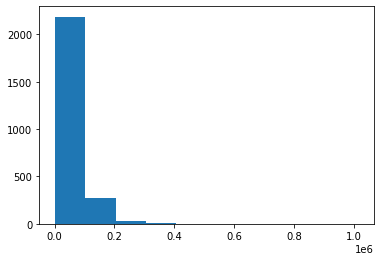

0.869 % of the cars have mileage less than 100k 

0.84 % of the cars have mileage less than 90k 



In [8]:
#handling mileage
mileage=data['mileage']
pyplot.hist(mileage)
pyplot.show()

print(round(mileage[mileage<100000].count()/len(mileage), 3), "% of the cars have mileage less than 100k", '\n') 
print(round(mileage[mileage<90000].count()/len(mileage), 3), "% of the cars have mileage less than 90k", '\n')

#I will divide the data in two groups. First group is with mileage less than 100k mileage, second is more
#The logic is to have balance, and some real world application, where if mileage is up to 100k, it is considered "slightly used"

new=[]
for i in range(len(data)): 
    if int(mileage[i])<100000: new.append(0)
    else: new.append(1)

numeric_data['mileage']=new

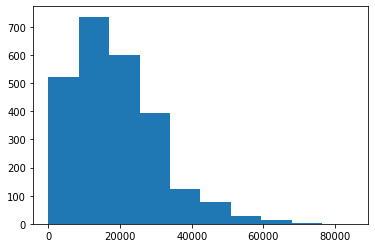

In [9]:
#we will also convert the price to a categorical value
price=data['price']
pyplot.hist(price)
pyplot.show()

new=[]
for i in range(len(data)):
    if price[i]<5000: new.append(0)
    elif price[i]<10000: new.append(1)
    elif price[i]<15000: new.append(2)
    elif price[i]<20000: new.append(3)
    elif price[i]<30000: new.append(4)
    elif price[i]<40000: new.append(5)
    else: new.append(2)
numeric_data['price']=new

In [10]:
#make sure 'numeric data' is legitimate
numeric_data

,price,brand,model,year,title_status,mileage,color,state,country,condition
0,1,27.0,25.0,0,0.0,1,2.0,24.0,1.0,2
1,0,8.0,92.0,0,0.0,1,39.0,35.0,1.0,2
2,1,7.0,75.0,1,0.0,0,39.0,7.0,1.0,2
3,4,8.0,32.0,0,0.0,0,4.0,39.0,1.0,1
4,4,5.0,0.0,1,0.0,0,34.0,6.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...
2494,1,24.0,120.0,1,0.0,0,34.0,3.0,1.0,2
2495,1,24.0,120.0,1,0.0,0,39.0,6.0,1.0,1
2496,1,24.0,120.0,1,0.0,0,39.0,6.0,1.0,1
2497,1,24.0,120.0,1,0.0,0,2.0,6.0,1.0,2


In [11]:
############ EXPLANATION ############
# We took the previous steps in order to build a decision tree
# We will train the tree to predict the price range
# When it is able to predict the price range, we will take the attribute weights and determine their influence on the price

A decision tree with  91.637 % accuracy, determines that the importance of the attributes are:
brand : 0.12
model : 0.27
year : 0.04
title_status : 0.07
mileage : 0.02
color : 0.17
state : 0.25
country : 0.0
condition : 0.06


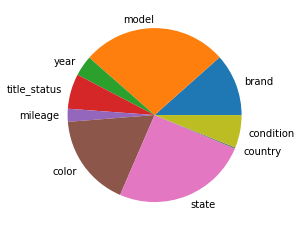

In [12]:
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import tree



X=numeric_data.iloc[:,1:]
y=numeric_data.iloc[:,0]

feature_names = X.columns

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

predictions=clf.predict(X)
accuracy=accuracy_score(y, predictions)

print("A decision tree with ", round(100*accuracy, 3), "% accuracy, determines that the importance of the attributes are:")

for i in range(len(feature_names)):
    print(feature_names[i], ":", round(clf.feature_importances_[i], 2))

y = clf.feature_importances_
mylabels = feature_names

plt.pie(y, labels = mylabels)
plt.show() 

A decision tree with  13.73 % root mean squared error, determines that the importance of the attributes are:
brand : 0.14
model : 0.25
year : 0.03
title_status : 0.07
mileage : 0.19
color : 0.1
state : 0.18
country : 0.0
condition : 0.04


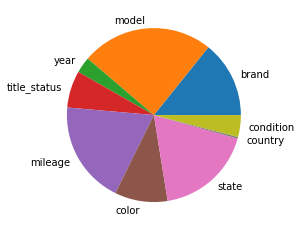

In [14]:
### AND IF WE USE THE ACTUAL PRICE (and not price ranges)
from sklearn.metrics import mean_squared_error

X=numeric_data.iloc[:,1:]
y=data['price']

feature_names = X.columns

clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)

predictions=clf.predict(X)
error=mean_squared_error(y, predictions)

print("A decision tree with ", round(100*error, 2), "% root mean squared error, determines that the importance of the attributes are:")

for i in range(len(feature_names)): print(feature_names[i], ":", round(clf.feature_importances_[i], 2))
    
y = clf.feature_importances_
mylabels = feature_names

plt.pie(y, labels = mylabels)
plt.show() 